In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read dataset
df = pd.read_csv('Basquiat_Dataset.csv')

In [5]:
df.head()

,Title,Type,Primary Medium,Year Created,Length (in),Width (in),Area (in),Size,Hammer Price,Seller,Seller City,Seller Country,Month,Year Sold,Unique Colors,Contrast Score,Brightness Score
0,Untitled,Painting,Acrylic,1982,72,68,4896,Medium,98000000,Sotheby's,New York City,United States,May,2017,462137,36.51,117.47
1,In This Case,Painting,Acrylic,1983,77,73,5621,Medium,81000000,Christie's,New York City,United States,May,2021,374696,19.60,137.63
2,Untitled,Painting,Acrylic,1982,94,197,18518,Large,73869000,Other,New York City,United States,May,2022,367901,20.81,127.06
3,Versus Medici,Painting,Acrylic,1982,84,54,4536,Medium,44000000,Sotheby's,New York City,United States,May,2021,327100,31.42,142.12
4,Dustheads,Painting,Acrylic,1982,72,84,6048,Medium,43500000,Christie's,New York City,United States,May,2013,592217,44.29,96.69


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              139 non-null    object 
 1   Type               139 non-null    object 
 2   Primary Medium     139 non-null    object 
 3   Year Created       139 non-null    int64  
 4   Length (in)        139 non-null    int64  
 5   Width (in)         139 non-null    int64  
 6   Area (in)          139 non-null    int64  
 7   Size               139 non-null    object 
 8   Hammer Price       139 non-null    int64  
 9   Seller             139 non-null    object 
 10  Seller City        139 non-null    object 
 11  Seller Country     139 non-null    object 
 12  Month              139 non-null    object 
 13  Year Sold          139 non-null    int64  
 14  Unique Colors      139 non-null    int64  
 15  Contrast Score     139 non-null    float64
 16  Brightness Score   139 non

In [7]:
df.describe()

,Year Created,Length (in),Width (in),Area (in),Hammer Price,Year Sold,Unique Colors,Contrast Score,Brightness Score
count,139.000000,139.000000,139.000000,139.000000,1.390000e+02,139.000000,139.000000,139.000000,139.000000
mean,1982.755396,60.482014,63.071942,4433.784173,1.179914e+07,2016.223022,253385.582734,19.848993,161.184173
std,1.680415,25.041517,39.268426,3891.399159,1.422787e+07,4.254653,133217.971309,9.326082,38.829094
min,1981.000000,14.000000,11.000000,154.000000,1.000000e+06,2005.000000,14392.000000,2.500000,45.300000
25%,1982.000000,39.500000,31.500000,1239.000000,3.750000e+06,2013.000000,151878.000000,13.170000,134.645000
50%,1982.000000,66.000000,60.000000,3600.000000,7.903000e+06,2017.000000,259823.000000,19.130000,159.560000
75%,1983.000000,77.000000,82.000000,6027.000000,1.279677e+07,2020.000000,355499.500000,25.920000,190.705000
max,1988.000000,145.000000,211.000000,21025.000000,9.800000e+07,2022.000000,592217.000000,47.460000,243.900000


In [8]:
# Rename columns with extra space at the end
# Rename hammer price to be more descriptive of data
df.rename(columns={'Hammer Price':'Hammer Price (USD in millions)','Seller ':'Seller', 'Unique Colors ':'Unique Colors', 'Brightness Score ':'Brightness Score'},inplace=True)

In [9]:
# Convert hammer price to more manageable variables
df['Hammer Price (USD in millions)']= df['Hammer Price (USD in millions)'].map(lambda x:x/1000000)

# Visualizations

<AxesSubplot:>

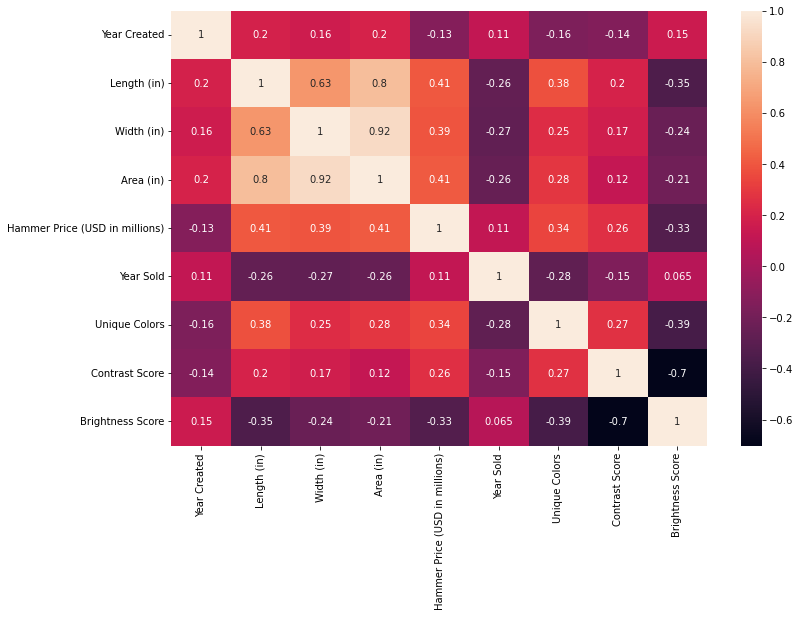

In [10]:
# Determine correlations between featuresb
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Type', ylabel='count'>

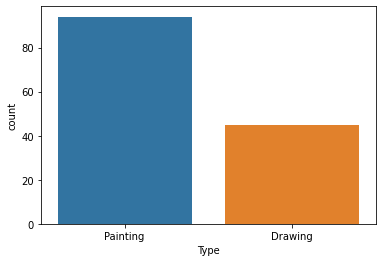

In [11]:
# Determine count of our primary categories, moving forward use mean since unbalanced data 
sns.countplot(x='Type',data=df)

[Text(0, 0, '15.8789'), Text(0, 0, '3.27702')]

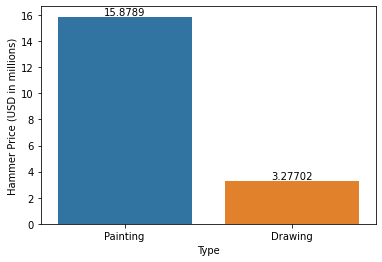

In [12]:
# On average, paintings are worth 5x drawings 
ax = sns.barplot(x='Type',y='Hammer Price (USD in millions)',data=df,estimator=np.mean,ci=False,)
ax.bar_label(ax.containers[0])

In [13]:
df.groupby('Primary Medium').sum()['Hammer Price (USD in millions)'].sort_values()

Primary Medium
Felt tip              2.022858
Pastels               2.655400
Wax Crayon            3.250000
Colored Pencils       3.550000
Pencil                5.000000
Ink                   8.907272
Oilstick            142.526222
Acrylic            1472.169251
Name: Hammer Price (USD in millions), dtype: float64

[Text(0, 0, '15.6614'),
 Text(0, 0, '4.45394'),
 Text(0, 0, '3.55'),
 Text(0, 0, '2.22682'),
 Text(0, 0, '2.6554'),
 Text(0, 0, '2.02286'),
 Text(0, 0, '1.625'),
 Text(0, 0, '1.25')]

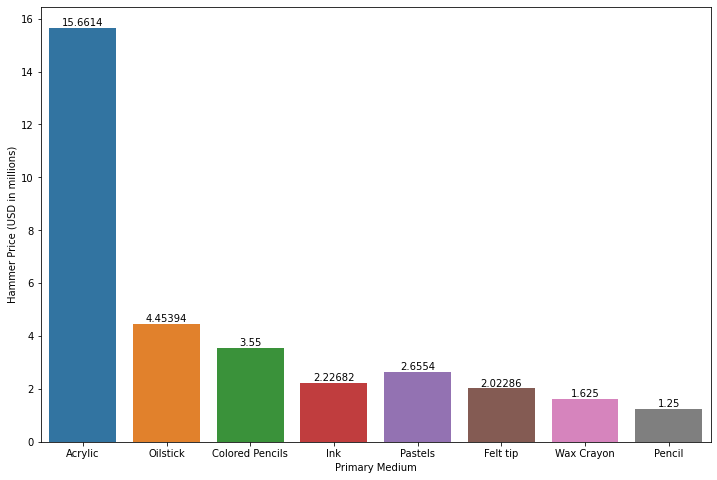

In [14]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Primary Medium',y='Hammer Price (USD in millions)',data=df,estimator=np.mean,ci=False)
ax.bar_label(ax.containers[0])

In [15]:
# Earlier years seem to have higher sales 
df.groupby('Year Created').sum()['Hammer Price (USD in millions)'].sort_values()

Year Created
1988     15.877759
1987     31.111392
1986     47.029926
1985     48.137993
1984    119.837694
1983    247.593713
1981    268.978186
1982    861.514340
Name: Hammer Price (USD in millions), dtype: float64

In [17]:
 df.groupby('Year Created').count()['Title'].sort_values()

Year Created
1988     2
1985     4
1986     5
1987     7
1984    15
1983    21
1981    25
1982    60
Name: Title, dtype: int64

[Text(0, 0, '1111.03'),
 Text(0, 0, '155.651'),
 Text(0, 0, '338.638'),
 Text(0, 0, '22.0874'),
 Text(0, 0, '12.673')]

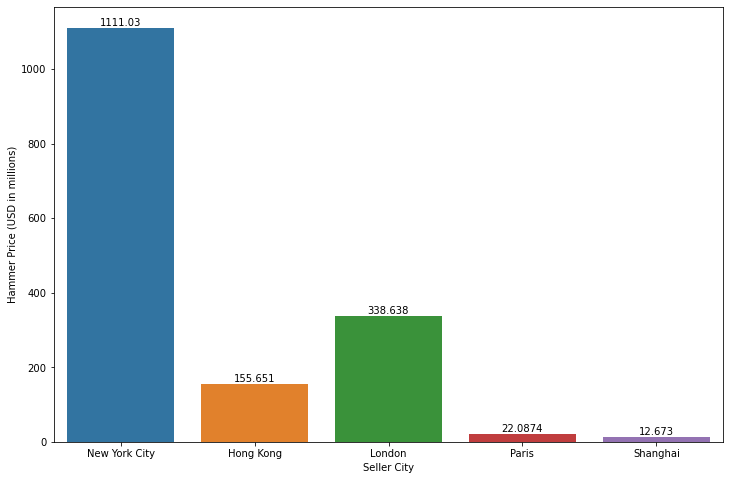

In [18]:
# No surprise, Basquiat was born and raised in Brooklyn and live most of his life in New York
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Seller City',y='Hammer Price (USD in millions)',data=df,estimator=sum,ci=False)
ax.bar_label(ax.containers[0])

[Text(0, 0, '12.4835'),
 Text(0, 0, '19.4564'),
 Text(0, 0, '8.68302'),
 Text(0, 0, '11.0437'),
 Text(0, 0, '12.673')]

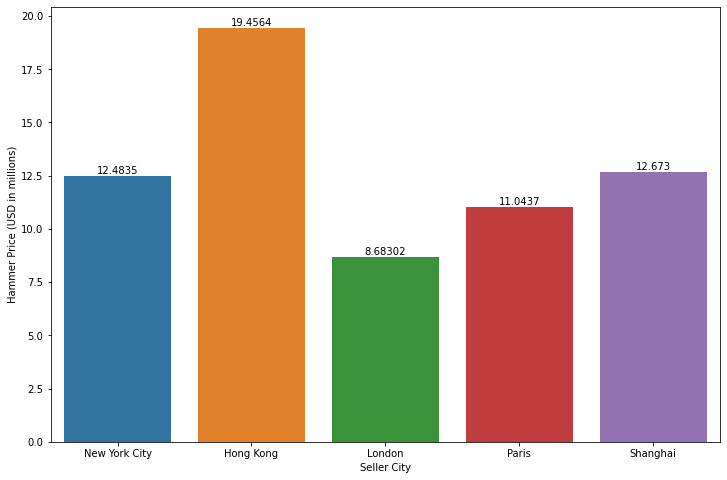

In [19]:
# Might slightly be because of currency conversion, but Chinese markets look to sell more expensive pieces  
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Seller City',y='Hammer Price (USD in millions)',data=df,estimator=np.mean,ci=False)
ax.bar_label(ax.containers[0])

[Text(0, 0, '1.20727'),
 Text(0, 0, '47.5657'),
 Text(0, 0, '50.9372'),
 Text(0, 0, '4.4'),
 Text(0, 0, '18.15'),
 Text(0, 0, '12.8709'),
 Text(0, 0, '89.4717'),
 Text(0, 0, '193.33'),
 Text(0, 0, '93.9457'),
 Text(0, 0, '73.8563'),
 Text(0, 0, '48.9672'),
 Text(0, 0, '196.749'),
 Text(0, 0, '190.355'),
 Text(0, 0, '72.6979'),
 Text(0, 0, '66.0084'),
 Text(0, 0, '363.693'),
 Text(0, 0, '115.876')]

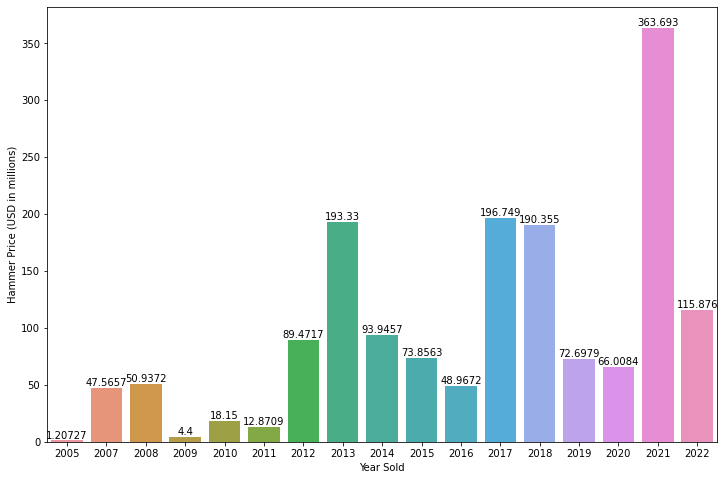

In [20]:
# Huge spike in sales for 2021! Why?
plt.figure(figsize=(12,8))
ax = sns.barplot(x='Year Sold',y='Hammer Price (USD in millions)',data=df,estimator=sum,ci=False)
ax.bar_label(ax.containers[0])

<AxesSubplot:xlabel='Contrast Score', ylabel='Hammer Price (USD in millions)'>

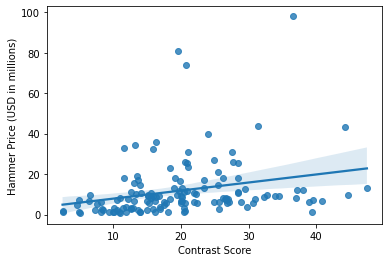

In [21]:
# Determine if contrast impacts hammer price, slight positive correlation
sns.regplot(x='Contrast Score', y='Hammer Price (USD in millions)',data=df)

<AxesSubplot:xlabel='Brightness Score', ylabel='Hammer Price (USD in millions)'>

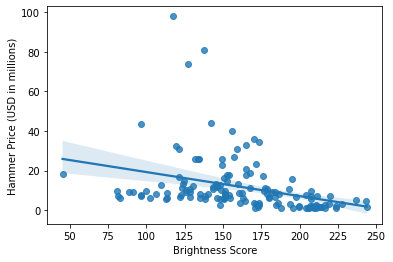

In [22]:
# Determine if brightness impacts hammer price, slight negative correlation
sns.regplot(x='Brightness Score', y='Hammer Price (USD in millions)',data=df)

<AxesSubplot:xlabel='Unique Colors', ylabel='Hammer Price (USD in millions)'>

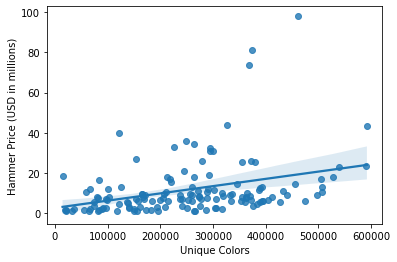

In [23]:
# Determine if colorfullness impacts hammer price, slight positve correlation
sns.regplot(x='Unique Colors', y='Hammer Price (USD in millions)',data=df)

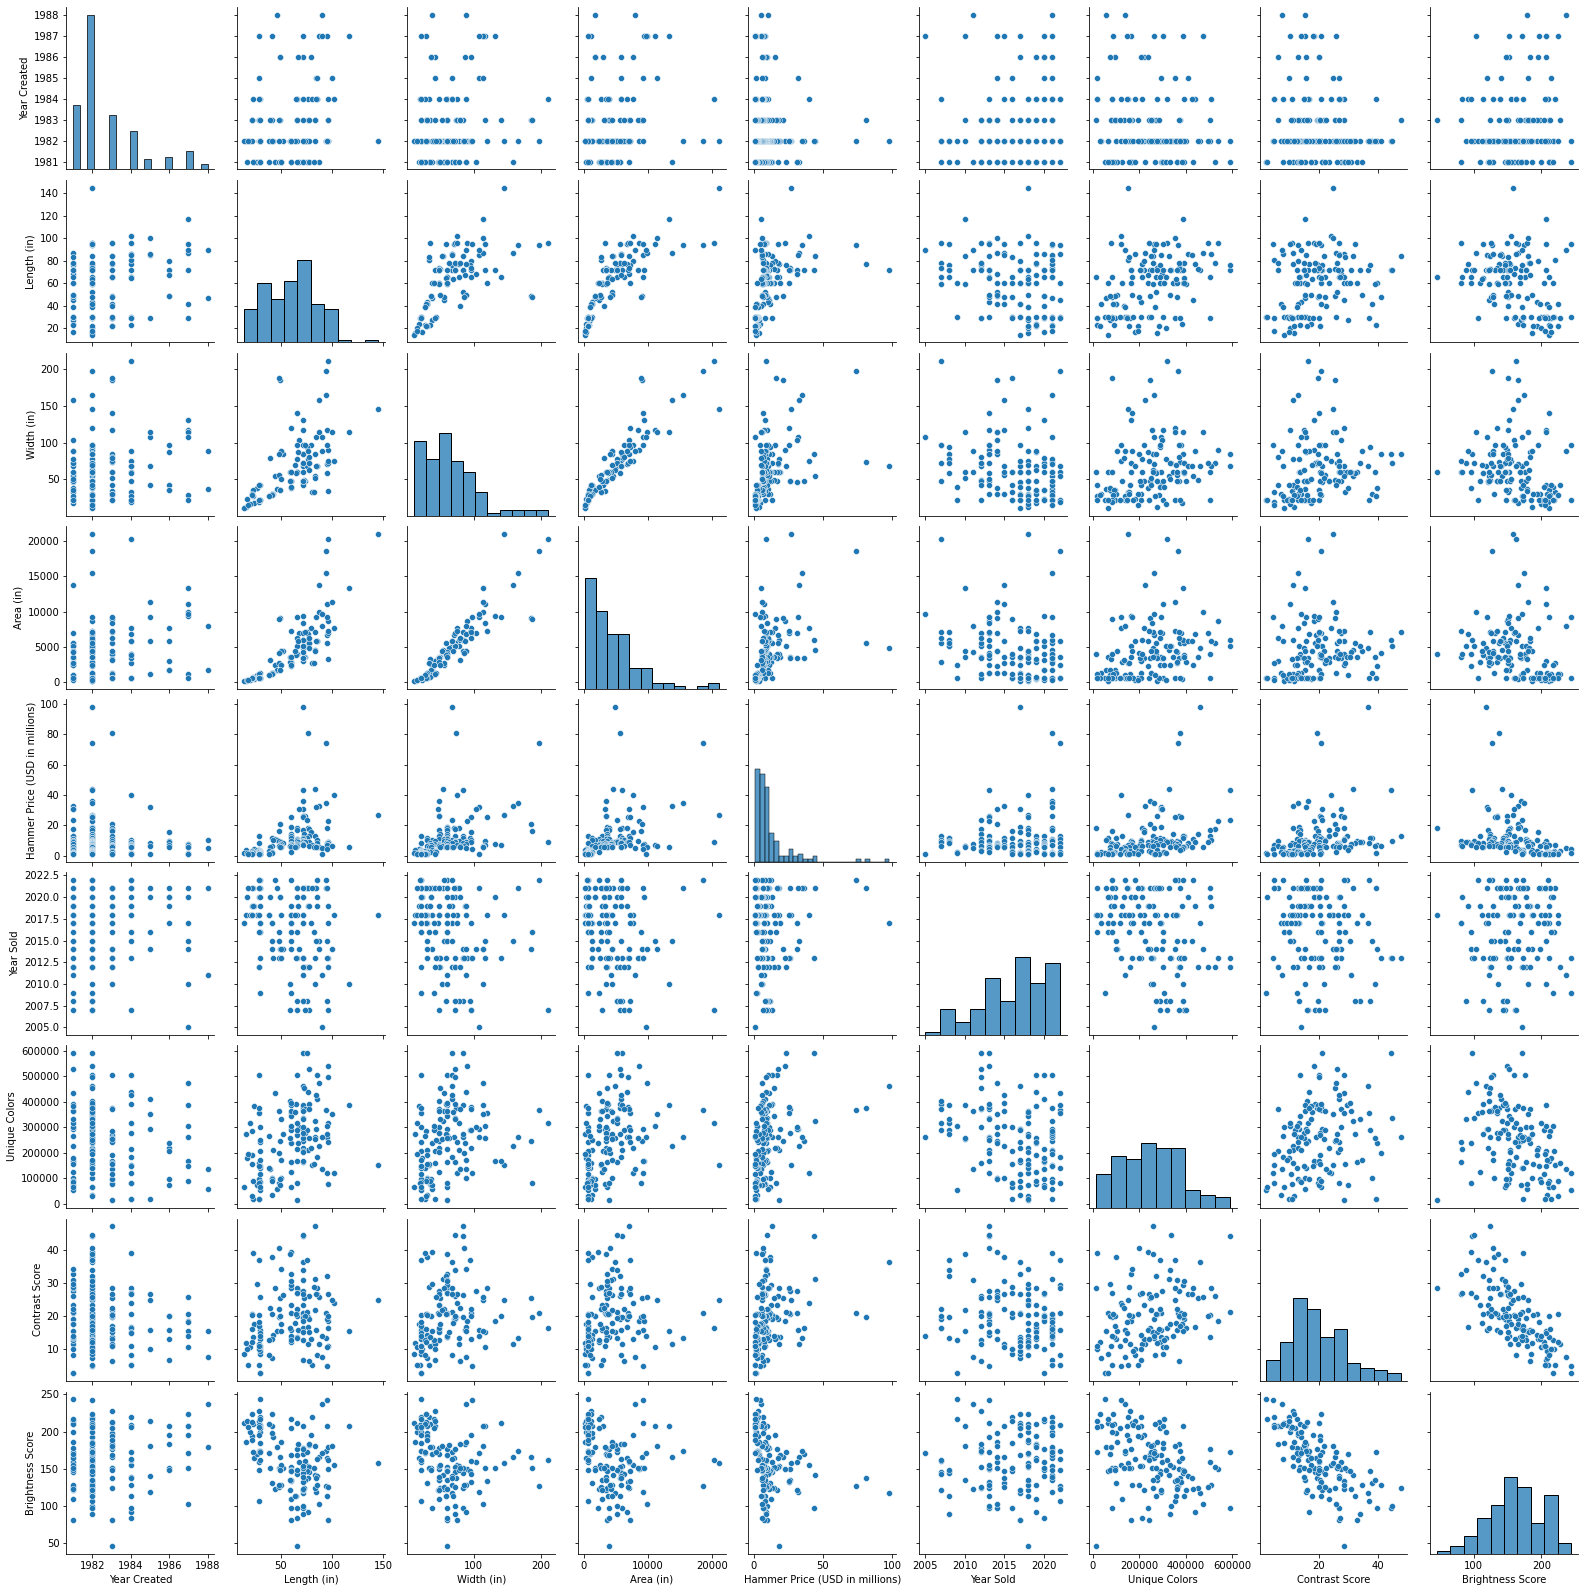

In [24]:
# Let's take a big picture view of the data
sns.pairplot(df)

# Preprocessing

### Outliers

<AxesSubplot:xlabel='Area (in)', ylabel='Hammer Price (USD in millions)'>

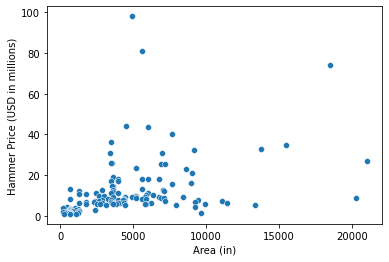

In [25]:
# Remove data points which do not follow general trend of data from highly correlated features
sns.scatterplot(x='Area (in)',y='Hammer Price (USD in millions)',data=df)

In [26]:
# Remove 4 outliers
df.drop(df[df['Area (in)'] > 20000].index,axis=0,inplace=True)
df.drop(df[df['Hammer Price (USD in millions)']>80].index,axis=0,inplace=True)

<AxesSubplot:xlabel='Area (in)', ylabel='Hammer Price (USD in millions)'>

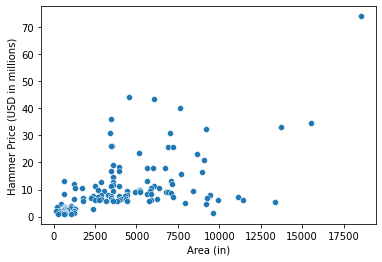

In [27]:
sns.scatterplot(x='Area (in)',y='Hammer Price (USD in millions)',data=df)

<AxesSubplot:xlabel='Unique Colors', ylabel='Hammer Price (USD in millions)'>

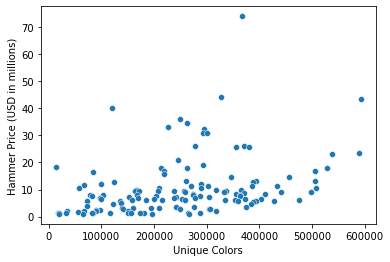

In [28]:
sns.scatterplot(x='Unique Colors',y='Hammer Price (USD in millions)',data=df)

In [29]:
# Remove 2 outliers
df.drop(df[df['Hammer Price (USD in millions)']>70].index,axis=0,inplace=True)

<AxesSubplot:xlabel='Unique Colors', ylabel='Hammer Price (USD in millions)'>

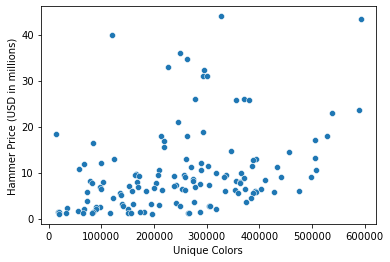

In [30]:
sns.scatterplot(x='Unique Colors',y='Hammer Price (USD in millions)',data=df)

<AxesSubplot:xlabel='Contrast Score', ylabel='Hammer Price (USD in millions)'>

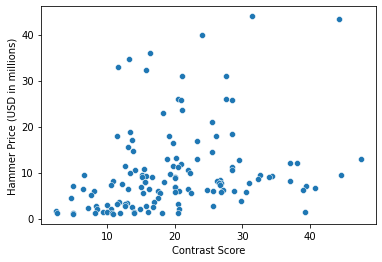

In [31]:
sns.scatterplot(x='Contrast Score',y='Hammer Price (USD in millions)',data=df)

In [32]:
# Remove 4 outliers
df.drop(df[(df['Contrast Score']<20) & (df['Hammer Price (USD in millions)']>30)].index,axis=0,inplace=True)

<AxesSubplot:xlabel='Contrast Score', ylabel='Hammer Price (USD in millions)'>

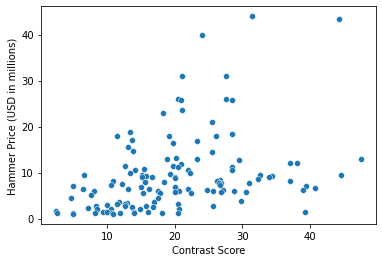

In [33]:
sns.scatterplot(x='Contrast Score',y='Hammer Price (USD in millions)',data=df)

In [34]:
# Removing outliers increased correlations with all features 
df.corr()['Hammer Price (USD in millions)'].sort_values()

Brightness Score                 -0.404220
Year Created                     -0.161613
Year Sold                        -0.043159
Contrast Score                    0.367563
Unique Colors                     0.381769
Width (in)                        0.385828
Area (in)                         0.395607
Length (in)                       0.461640
Hammer Price (USD in millions)    1.000000
Name: Hammer Price (USD in millions), dtype: float64

### Data Transformation

In [35]:
df.head()

,Title,Type,Primary Medium,Year Created,Length (in),Width (in),Area (in),Size,Hammer Price (USD in millions),Seller,Seller City,Seller Country,Month,Year Sold,Unique Colors,Contrast Score,Brightness Score
3,Versus Medici,Painting,Acrylic,1982,84,54,4536,Medium,44.0,Sotheby's,New York City,United States,May,2021,327100,31.42,142.12
4,Dustheads,Painting,Acrylic,1982,72,84,6048,Medium,43.5,Christie's,New York City,United States,May,2013,592217,44.29,96.69
5,Flexible,Painting,Acrylic,1984,102,75,7650,Medium,40.0,Other,New York City,United States,May,2018,121109,24.02,155.57
10,La Hara,Painting,Acrylic,1981,72,47,3384,Medium,31.0,Christie's,New York City,United States,May,2017,293449,21.03,121.50
11,Untitled,Painting,Acrylic,1981,68,103,7004,Medium,31.0,Christie's,New York City,United States,May,2014,300724,27.52,159.21


In [36]:
# Drop unnecessary columns 
df.drop(['Title','Length (in)','Width (in)','Seller Country','Month'],axis=1,inplace=True)

In [37]:
#Converting our categorial variables 
art_type = pd.get_dummies(df['Type'],drop_first=True)
primary_medium = pd.get_dummies(df['Primary Medium'],drop_first=True)
size = pd.get_dummies(df['Size'],drop_first=True)
seller = pd.get_dummies(df['Seller'],drop_first=True)
seller_city = pd.get_dummies(df['Seller City'],drop_first=True)

In [39]:
# Drop converted columns 
df.drop(['Type','Primary Medium','Size','Seller','Seller City'],axis=1,inplace=True)

In [40]:
# Add dummy variables to dataframe 
df = pd.concat([df,art_type,primary_medium,size,seller,seller_city],axis=1)

In [41]:
df.head()

,Year Created,Area (in),Hammer Price (USD in millions),Year Sold,Unique Colors,Contrast Score,Brightness Score,Painting,Colored Pencils,Felt tip,...,Pencil,Wax Crayon,Medium,Small,Other,Sotheby's,London,New York City,Paris,Shanghai
3,1982,4536,44.0,2021,327100,31.42,142.12,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1982,6048,43.5,2013,592217,44.29,96.69,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,1984,7650,40.0,2018,121109,24.02,155.57,1,0,0,...,0,0,1,0,1,0,0,1,0,0
10,1981,3384,31.0,2017,293449,21.03,121.50,1,0,0,...,0,0,1,0,0,0,0,1,0,0
11,1981,7004,31.0,2014,300724,27.52,159.21,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [42]:
# Determines dummy variables  medium (size) and paintings as highly correlated 
df.corr()['Hammer Price (USD in millions)'].sort_values()

Small                            -0.499574
Brightness Score                 -0.404220
Oilstick                         -0.338753
Pencil                           -0.174737
Year Created                     -0.161613
Ink                              -0.153666
Wax Crayon                       -0.116914
Sotheby's                        -0.109696
Felt tip                         -0.078108
Pastels                          -0.071366
Colored Pencils                  -0.061830
Other                            -0.058762
London                           -0.052111
Year Sold                        -0.043159
New York City                    -0.024338
Paris                             0.025623
Shanghai                          0.035415
Contrast Score                    0.367563
Unique Colors                     0.381769
Area (in)                         0.395607
Medium                            0.469737
Painting                          0.535012
Hammer Price (USD in millions)    1.000000
Name: Hamme

# Build Model

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Hammer Price (USD in millions)',axis=1), 
                                                    df['Hammer Price (USD in millions)'], test_size=0.30)

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
# Standardize data
scaler.fit(X_train)

StandardScaler()

In [48]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lm = LinearRegression()

In [51]:
# Train model
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
# Test model
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

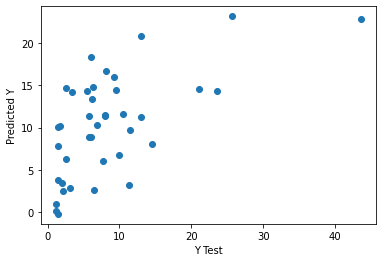

In [53]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [54]:
from sklearn import metrics

In [55]:
# Results
print('MSE:', metrics.mean_squared_error(y_test, predictions))
# This is an improvement, but can be improved further

MSE: 46.603606888065706


# Improve Model

In [56]:
hammer_price = (df['Hammer Price (USD in millions)'])

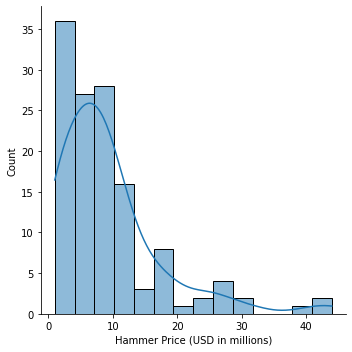

In [57]:
# We have confirmed our y-value is right skewed 
sns.displot(x=hammer_price,data=df,kde=True)

In [58]:
# Convert hammer price into a normal distribution
price_log = np.log(df['Hammer Price (USD in millions)'])

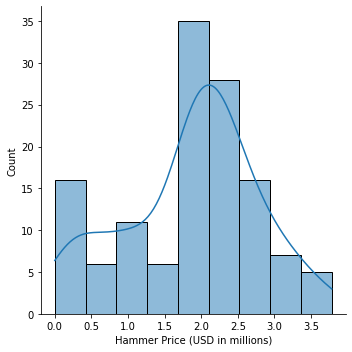

In [59]:
# Confirmed data is now normally distributed
sns.displot(x=price_log,data=df,kde=True)

In [61]:
# Skew much closer to 0
print('Hammer Price: ',hammer_price.skew())
print('Transformed Hammer Price: ',price_log.skew())

Hammer Price:  2.010450286987615
Transformed Hammer Price:  -0.31828374634712286


In [62]:
# Rerun model training and testing with normally distributed data

X_train, X_test, y_train, y_test = train_test_split(df.drop('Hammer Price (USD in millions)',axis=1), 
                                                    price_log, test_size=0.30)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Y')

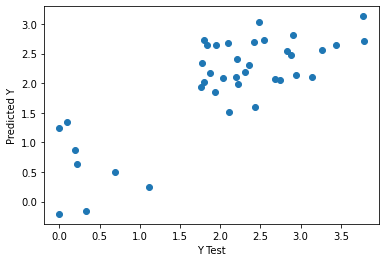

In [63]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [65]:
# Results
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MSE: 0.37707292887406835
MAE: 0.5131910503202088
RMSE: 0.6140626424674183
